<a href="https://colab.research.google.com/github/tlinhnguyen2308/CNN/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/nhandienkhuonmat")

print("Path to dataset files:", path)

100%|██████████| 63.3M/63.3M [00:03<00:00, 16.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ppduyn/nhandienkhuonmat/versions/1


In [72]:
import kagglehub
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [73]:
print("Dataset path:", path)
print("Folders in dataset:", os.listdir(path))  # Print folder names

Dataset path: /kaggle/input/nhandienkhuonmat
Folders in dataset: ['AI']


In [74]:
face_path = os.path.join(path, "AI", "Nhận diện khuôn mặt")

# Cấu hình
image_size = 64
data = []
labels = []

# Tự động lấy tên người (nhãn) từ thư mục con
label_names = sorted(os.listdir(face_path))
print("Các lớp khuôn mặt:", label_names)

# Load ảnh và gán nhãn
for i, label_name in enumerate(label_names):
    folder = os.path.join(face_path, label_name)
    if not os.path.isdir(folder):
        continue

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img)
            labels.append(i)
        except:
            continue

# Chuyển sang numpy array
data = np.array(data)
labels = to_categorical(labels, num_classes=len(label_names))

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Các lớp khuôn mặt: ['Kim Tuyền', 'Ngọc Lan', 'Phương Duyên', 'Thuý Vy', 'Thuỳ Linh']


In [83]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Huấn luyện
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,845 (2.61 MB)

 Trainable params: 683,845 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0417 - loss: 1.6185 - val_accuracy: 0.6667 - val_loss: 1.2367
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4583 - loss: 1.4035 - val_accuracy: 0.6667 - val_loss: 0.9805
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4583 - loss: 1.4120 - val_accuracy: 0.6667 - val_loss: 0.9987
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.4583 - loss: 1.2974 - val_accuracy: 0.6667 - val_loss: 1.0713
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5833 - loss: 1.2392 - val_accuracy: 0.6667 - val_loss: 1.0540
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6250 - loss: 1.2302 - val_accuracy: 0.6667 - val_loss: 0.9605
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4583 - loss: 1.1537 - val_accuracy: 0.6667 - val_loss: 0.9095
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4583 - loss: 1.1400 - val_accuracy: 0.6667 - val_loss: 0.9223

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


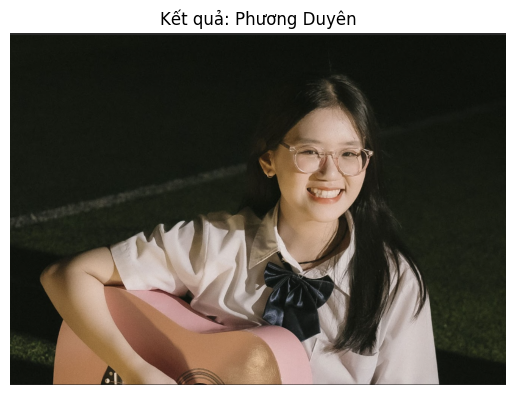

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8333 - loss: 0.9889
Độ chính xác trên tập kiểm tra: 0.8333333134651184


In [84]:
def preprocess_image_face(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    return np.expand_dims(img, axis=0)

# Đường dẫn đến ảnh cần dự đoán
image_path = "/content/pduyn.png"
processed_image = preprocess_image_face(image_path)

# Dự đoán
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)

# Hiển thị ảnh và kết quả
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Kết quả: {label_names[predicted_class]}')
plt.axis('off')
plt.show()

# Đánh giá mô hình
loss, acc = model.evaluate(X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


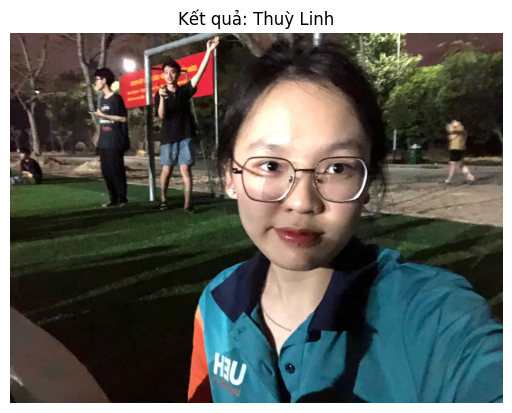

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8333 - loss: 0.9889
Độ chính xác trên tập kiểm tra: 0.8333333134651184


In [85]:
def preprocess_image_face(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    return np.expand_dims(img, axis=0)

# Đường dẫn đến ảnh cần dự đoán
image_path = "/content/h1.jpg"
processed_image = preprocess_image_face(image_path)

# Dự đoán
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)

# Hiển thị ảnh và kết quả
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Kết quả: {label_names[predicted_class]}')
plt.axis('off')
plt.show()

# Đánh giá mô hình
loss, acc = model.evaluate(X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", acc)

In [86]:
emotion_path = os.path.join(path, "AI", "Cảm xúc")

# Cấu hình
image_size = 64
data = []
labels = []

# Tên các lớp cảm xúc
label_names = sorted(os.listdir(emotion_path))
print("Các lớp cảm xúc:", label_names)

# Load ảnh
for i, label_name in enumerate(label_names):
    folder = os.path.join(emotion_path, label_name)
    if not os.path.isdir(folder):
        continue

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img)
            labels.append(i)
        except:
            continue

# Chuyển dữ liệu
data = np.array(data)
labels = to_categorical(labels, num_classes=len(label_names))

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Các lớp cảm xúc: ['Buồn', 'Giận', 'Vui']


In [87]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Huấn luyện
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,587 (2.61 MB)

 Trainable params: 683,587 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4062 - loss: 1.0714 - val_accuracy: 0.2500 - val_loss: 1.0958
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4062 - loss: 1.0753 - val_accuracy: 0.6250 - val_loss: 1.0497
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3438 - loss: 1.0838 - val_accuracy: 0.2500 - val_loss: 1.1918
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.3750 - loss: 1.0536 - val_accuracy: 0.3750 - val_loss: 1.0503
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.9982 - val_accuracy: 0.5000 - val_loss: 0.9485
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.5938 - loss: 0.9378 - val_accuracy: 0.6250 - val_loss: 0.9554
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6250 - loss: 0.9046 - val_accuracy: 0.3750 - val_loss: 1.0263
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6562 - loss: 0.9161 - val_accuracy: 0.6250 - val_loss: 1.1184

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


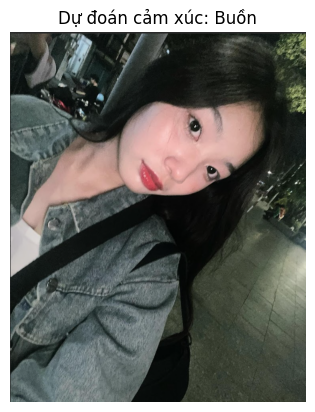

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7500 - loss: 0.9141
Độ chính xác: 0.75


In [89]:
def preprocess_image_cnn(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    return np.expand_dims(img, axis=0)

# Ảnh đầu vào
image_path = '/content/minn.png'
processed_image = preprocess_image_cnn(image_path)

# Dự đoán
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)

# Hiển thị kết quả
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Dự đoán cảm xúc: {label_names[predicted_class]}')
plt.axis('off')
plt.show()

# Đánh giá mô hình
loss, acc = model.evaluate(X_test, y_test)
print("Độ chính xác:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


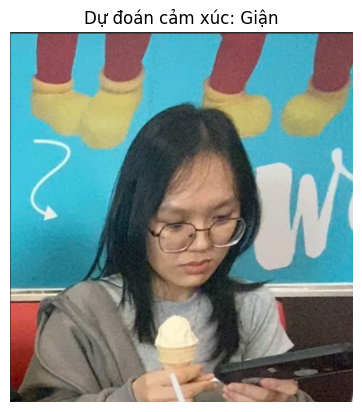

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7500 - loss: 0.9141
Độ chính xác: 0.75


In [91]:
def preprocess_image_cnn(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    return np.expand_dims(img, axis=0)

# Ảnh đầu vào
image_path = '/content/tlinh giận.png'
processed_image = preprocess_image_cnn(image_path)

# Dự đoán
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)

# Hiển thị kết quả
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Dự đoán cảm xúc: {label_names[predicted_class]}')
plt.axis('off')
plt.show()

# Đánh giá mô hình
loss, acc = model.evaluate(X_test, y_test)
print("Độ chính xác:", acc)